# RQ1: What are the most popular programming languages used by source files in Docker images?

## Load data and import libraries

In [1]:
%load_ext autoreload

# Auto reloading causes the kernel to reload the libraries we have
%autoreload 2

# usual imports for visualization, etc.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import matplotlib.ticker as ticker
import datetime

# make it reproducible
np.random.seed(0)

# show plots inline
%matplotlib inline

In [2]:
data_folder = '../data/'

docker_image_dataset = pd.read_csv(data_folder + 'docker_image_dataset.csv', error_bad_lines=False, warn_bad_lines=False,low_memory=False)

## Define helper functions and defaults

In [3]:
!mkdir figs
figs_dir = 'figs/'
colors_list = ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabebe', '#469990', '#e6beff', '#9A6324', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9']

In [4]:
from cycler import cycler
def set_plt_rc():
    SMALL_SIZE = 8
    MEDIUM_SIZE = 10
    BIGGER_SIZE = 12
    
    font = {'family': 'serif','size': BIGGER_SIZE}
    plt.rc('font', **font)

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
        
    plt.rc('axes', prop_cycle=(cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
                                         '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                                         '#bcbd22', '#17becf']) +
                           cycler(linestyle=['-', '--', ':', '-.','-', '--', ':', '-.','-', '--'])))
    
set_plt_rc()

## Popular Programming Languages


In [5]:
dockerfiles=docker_image_dataset.query("collection_method=='GitHubCI' or collection_method=='NameMatch'").copy()
language=dockerfiles[dockerfiles['language']!='Dockerfile']['language']
language=language.dropna()
language_proportion=language.value_counts()/len(language)*100.0
print('Top 10 popular programming languages used in docker images')
print(language_proportion[:10])

Top 10 popular programming languages used in docker images
Shell         37.091146
Python        13.390112
JavaScript    12.333205
Go             8.295791
Java           3.988787
HTML           3.350210
Ruby           2.663720
PHP            2.564323
Makefile       2.200340
TypeScript     1.377984
Name: language, dtype: float64


In [6]:
# Over time
year_list=range(2014,2020)
update_year=pd.DatetimeIndex(dockerfiles['updated_at']).year
dockerfiles['update_year']=update_year
all_language_trend=pd.DataFrame(columns=['Year','Language','Proportion'])
for year in year_list:
    language=dockerfiles[dockerfiles['language']!='Dockerfile']
    language=language[language['update_year']==year]
    language['language']=language['language'].dropna()
    language_proportion=language['language'].value_counts()/len(language)*100.0
    for i in range(language_proportion.size):
        all_language_trend=all_language_trend.append(pd.DataFrame([[year,language_proportion.index[i],language_proportion[i]]],columns=['Year','Language','Proportion']),ignore_index=True)
# Over time
year_list=range(2014,2020)
update_year=pd.DatetimeIndex(dockerfiles['updated_at']).year
dockerfiles['update_year']=update_year
language_trend=pd.DataFrame(columns=['Year','Language','Proportion'])
for year in year_list:
    language=dockerfiles[dockerfiles['language']!='Dockerfile']
    language=language[language['update_year']==year]
    language['language']=language['language'].dropna()
    language_proportion=language['language'].value_counts()/len(language)*100.0
    for i in range(10):
        try:
            language_trend=language_trend.append(pd.DataFrame([[year,language_proportion.index[i],language_proportion[i]]],columns=['Year','Language','Proportion']),ignore_index=True)
        except:
            continue
lang=language_proportion[:10].index
lang.index=range(0,lang.size)
for year in year_list:
    for i in range(0,lang.size):
        dt=language_trend.query("Year=={} and Language=='{}'".format(year,lang[i]))
        if(dt.shape[0]==0):
            try:
                prop=all_language_trend.query("Year=={} and Language=='{}'".format(year,lang[i]))['Proportion']
                prop=prop[prop.index[0]]
            except:
                prop=0
            language_trend=language_trend.append(pd.DataFrame([[year,lang[i],prop]],columns=['Year','Language','Proportion']),ignore_index=True)

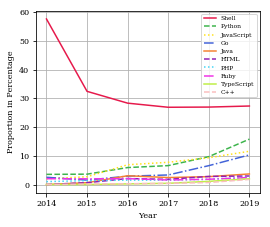

In [7]:
fig=plt.figure(figsize=(4,3.35))
plt.rc('font', size=8)
plt.rc('axes', titlesize=6)
plt.rc('axes', labelsize=8)
ax=plt.subplot(111)
ax.grid()
#ax.set_ylim(1,45)
for i in range(0,lang.size):
    ax.plot(year_list, language_trend[language_trend['Language']==lang[i]].sort_values(by=['Year'])['Proportion'], label=lang[i],color=colors_list[i]) 
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Proportion in Percentage')
ax.legend(prop=dict(size=6))
fig.savefig(figs_dir+'popular-languages-over-time', dpi=300)
fig.savefig(figs_dir+'popular-languages-over-time.pdf')